In [1]:
import numpy as np

In [2]:
data_file = 'data/data.txt'

In [7]:
data = np.loadtxt(data_file)

data = np.loadtxt(data_file).T

In [11]:
print(data.shape)
# print(data[0])
# print(data[1])

for i in range(data.shape[0]):
    print(data[i])

(3, 15)
[-1.         -0.71428571 -0.42857143 -0.14285714  0.14285714  0.42857143
  0.71428571  1.          1.28571429  1.57142857  1.85714286  2.14285714
  2.42857143  2.71428571  3.        ]
[-2.18680522e+00 -1.16483443e+00 -1.05030407e+00 -3.26374000e-03
  4.28162100e-02  2.70203372e+00  3.66231163e+00  3.82192392e+00
  4.07419325e+00  3.73864891e+00  6.35436737e+00  5.86898538e+00
  4.87059017e+00  7.33237739e+00  9.80876717e+00]
[0.5        0.57142857 0.64285714 0.71428571 0.78571429 0.85714286
 0.92857143 1.         1.07142857 1.14285714 1.21428571 1.28571429
 1.35714286 1.42857143 1.5       ]


In [12]:
import matplotlib.pyplot as plt

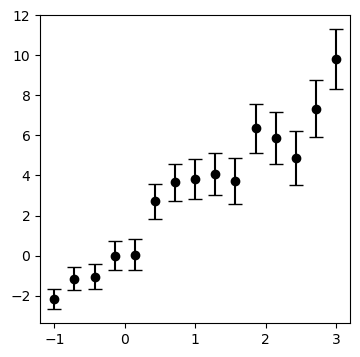

In [22]:
x = data[0].copy()
y = data[1].copy()
err = data[2].copy()

plt.figure(figsize=(4,4))
# plt.plot(x,y)
plt.errorbar(x,y,yerr=err,ls='none',marker='o',capsize=5,color='k')
plt.show()

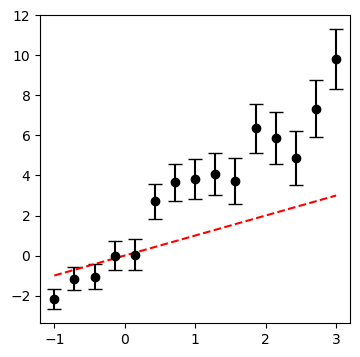

In [56]:
my_x = x.copy() #np.linspace(-1.2,3.2,50)

my_y = 3.0*my_x

slope,intercept = 1.0,0.0
my_y = slope*my_x + intercept

plt.figure(figsize=(4,4))
plt.errorbar(x,y,yerr=err,ls='none',marker='o',capsize=5,color='k')
plt.plot(my_x,my_y,'r--')
plt.show()

In [50]:
# my_x,x
# np.abs(y - my_y)
# (y-my_y)**2
# np.sum((y-my_y)**2)

# np.sum((y-my_y)**2/(err)**2) # chii_squared sum_i ((data_i - model_i) / error_i)**2

chi2 = np.sum((y-my_y)**2/(err)**2)
print(chi2)

9038.594450104283


In [62]:
slope,intercept = 2.5,0.0
my_y = slope*my_x + intercept
chi2 = np.sum((y-my_y)**2/(err)**2)
print(chi2)

17.545541591091343


# this is a comment
## this is another one

# Ways of exploring parameter space
## Brute force
1. Create a grid of parameter values
2. Calculate $\chi^{2}$ at each parameter location
3. Find the parameter values that minimize $\chi^2$

## Stochastic parameter inference
1. MCMC techniques (Markov Chain Monte Carlo)

In [64]:
# Brute force
slopes = np.linspace(-2,3,10)
intercepts = np.linspace(-5,5,10)

chi2 = np.zeros(slopes.size*intercepts.size,float)

counter = 0
for i in range(slopes.size):
    for j in range(intercepts.size):
        slope,intercept = slopes[i],intercepts[j]
        my_y = slope*my_x + intercept
        chi2[counter] = np.sum((y-my_y)**2/(err)**2)
        counter = counter + 1
print(chi2)

[1451.87497705 1178.39393742  956.71590536  786.84088087  668.76886393
  602.49985456  588.03385275  625.3708585   714.51087181  855.45389269
 1294.58380949 1026.04034191  809.29988189  644.36242944  531.22798455
  469.89654722  460.36811746  502.64269526  596.72028062  742.60087354
 1154.07130701  890.46541148  678.66252351  518.6626431   410.46577026
  354.07190497  349.48104725  396.6931971   495.7083545   646.52651947
 1030.33746962  771.66914613  564.8038302   409.74152184  306.48222104
  255.02592781  255.37264213  307.52236402  411.47509347  567.23083049
  923.3822973   669.65154586  467.72380198  317.59906567  219.27733692
  172.75861572  178.0429021   235.13019603  344.02049753  504.71380659
  833.20579008  584.41261068  387.42243885  242.23527458  148.85111787
  107.26996872  117.49182714  179.51669312  293.34456666  458.97544777
  759.80794794  515.95234058  323.8997408   183.65014857   95.20356391
   58.55998681   73.71941727  140.6818553   259.44730089  430.01575404
  703.